In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

sys.path.append("../model")
from networks import *
from analysis_util import *
%load_ext autoreload
%autoreload 2

## Pendulum Example

In [4]:
model_labels = [r"LREN", r"DENIS"]

PATH = "../saved/logs/models/lren-denis-exp"

x_true = np.load('../data/raw_data/affine/pendulum-large.npy')

models, model_configs = load_models([LREN], PATH, ["lren_pendulum"])
models1, model_configs2 = load_models([DENIS], PATH, ["denis_pendulum"])
models.append(models1[0])
model_configs.append(model_configs2[0])

In [5]:
lren = models[0]
denis = models[1]
with torch.no_grad():
    y_true, y_lren = lren.forward(torch.Tensor(x_true), 500)
    y_true, y_denis = denis.forward(torch.Tensor(x_true), 500)

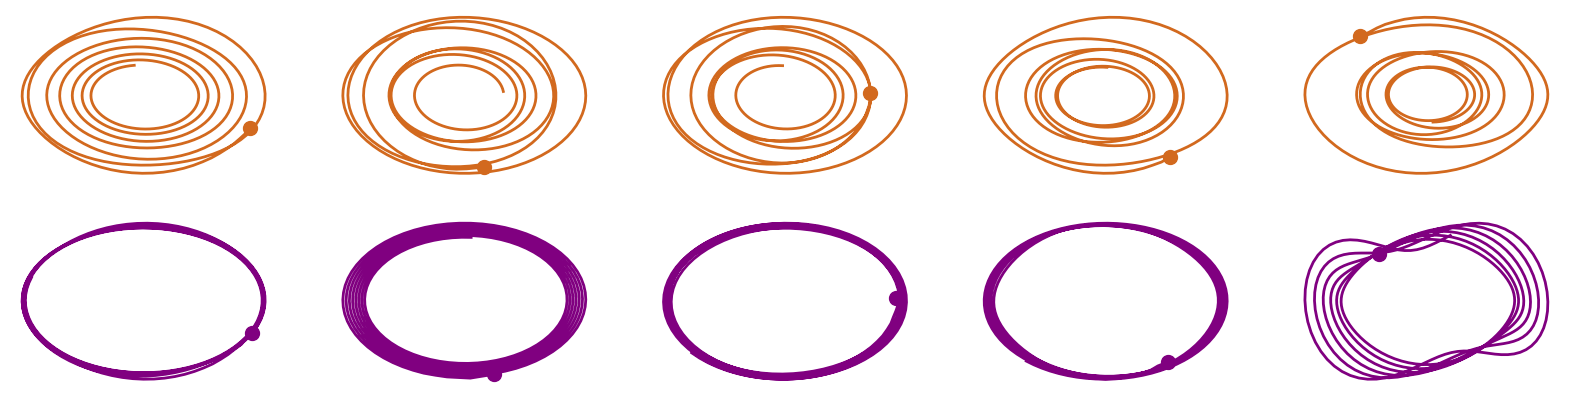

In [6]:
fig, ax = plt.subplots(2, 5, figsize=(20, 5), dpi=100)
lw=2
#indices = np.random.randint(0, len(y_true), 5)
indices = [935, 805, 744, 114, 128]
for i, idx in enumerate(indices):
    
    ax[0, i].plot(y_lren[idx, :, 0], y_lren[idx, :, 1], c='chocolate', linewidth=lw)
    ax[0, i].scatter(y_lren[idx, 0, 0], y_lren[idx, 0, 1], c='chocolate', s=100)
    #ax[0, i].plot(x_true[idx, :100, 0], x_true[idx, :100, 1], '--', c='grey', linewidth=lw)
    ax[0, i].axis('off')
    
for i, idx in enumerate(indices):
    ax[1, i].plot(y_denis[idx, :, 0], y_denis[idx, :, 1], c='purple', linewidth=lw)
    ax[1, i].scatter(y_denis[idx, 0, 0], y_denis[idx, 0, 1], c='purple', s=100)
    #ax[1, i].plot(x_true[idx, :100, 0], x_true[idx, :, 1], '--', c='grey', linewidth=lw)
    ax[1, i].axis('off')

plt.show()

100%|██████████| 2/2 [00:13<00:00,  6.62s/it]


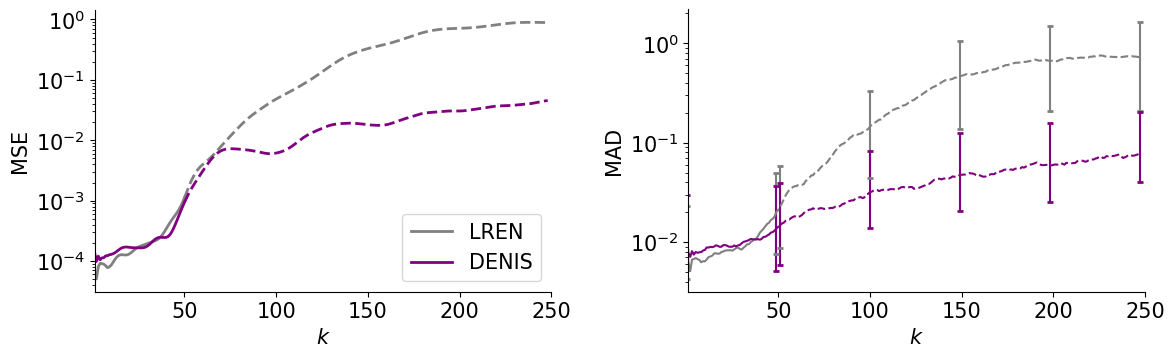

In [7]:
n_shifts = model_configs[0]['n_shifts']
t_end = 250
results = plot_mse_mad(models, model_labels, x_true, n_shifts, t_end)

## Duffing Example

In [8]:
model_labels = [r"LREN", r"DENIS"]

PATH = "../saved/logs/models/lren-denis-exp"

x_true = np.load('../data/raw_data/affine/duffing-large.npy')

models, model_configs = load_models([LREN], PATH, ["lren-duffing-100"])
models1, model_configs2 = load_models([DENIS], PATH, ["d-rbf-exp-3"])
models.append(models1[0])
model_configs.append(model_configs2[0])

In [9]:
lren = models[0]
denis = models[1]
with torch.no_grad():
    y_true, y_lren = lren.forward(torch.Tensor(x_true), 250)
    y_true, y_denis = denis.forward(torch.Tensor(x_true), 250)

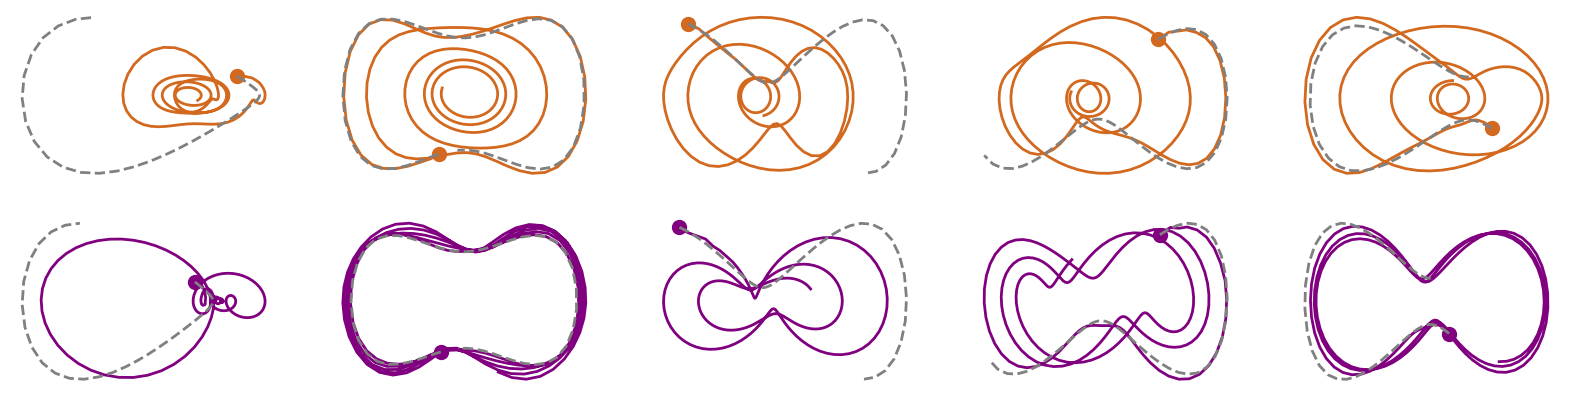

In [10]:
fig, ax = plt.subplots(2, 5, figsize=(20, 5), dpi=100)
lw=2
#indices = np.random.randint(0, len(y_true), 5)
indices = [252, 793,  60, 879, 111]
for i, idx in enumerate(indices):
    ax[0, i].plot(y_lren[idx, :, 0], y_lren[idx, :, 1], c='chocolate', linewidth=lw)
    ax[0, i].scatter(y_lren[idx, 0, 0], y_lren[idx, 0, 1], c='chocolate', s=100)
    ax[0, i].plot(x_true[idx, :50, 0], x_true[idx, :50, 1], '--', c='grey', linewidth=lw)
    ax[0, i].axis('off')
    
for i, idx in enumerate(indices):
    ax[1, i].plot(y_denis[idx, :, 0], y_denis[idx, :, 1], c='purple', linewidth=lw)
    ax[1, i].scatter(y_denis[idx, 0, 0], y_denis[idx, 0, 1], c='purple', s=100)
    ax[1, i].plot(x_true[idx, :50, 0], x_true[idx, :50, 1], '--', c='grey', linewidth=lw)
    ax[1, i].axis('off')

plt.show()

100%|██████████| 2/2 [00:08<00:00,  4.41s/it]


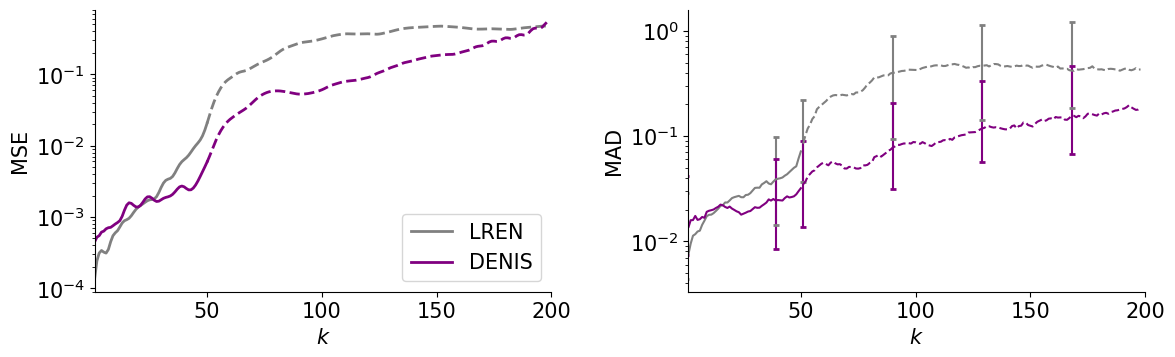

In [11]:
n_shifts = model_configs[0]['n_shifts']
t_end = 200
results = plot_mse_mad(models, model_labels, x_true, n_shifts, t_end)

In [15]:
sol_lr, sol_de, sol_true = y_lren[793, :, :2], y_denis[793, :, :2], x_true[793, :]

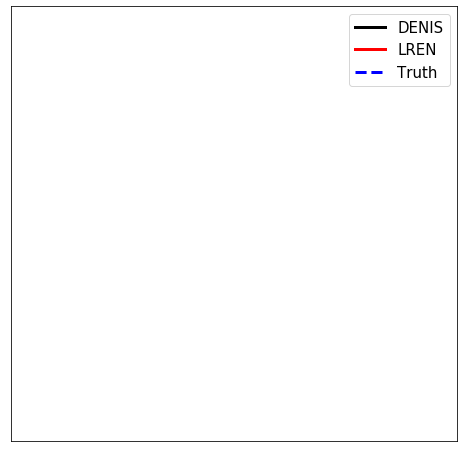

In [31]:
import matplotlib.animation as animation


fig = plt.figure(figsize=(8, 8), facecolor='w')
ax = fig.add_subplot(1, 1, 1)
plt.rcParams['font.size'] = 15
ax.set_xlim([-1, 1])
ax.set_ylim([-2, 2])
ax.set_yticks([])
ax.set_xticks([])
lns = []
t = np.arange(0, 25, 0.1)

for i in range(len(sol_de)):
    ln, = ax.plot([0, np.sin(sol_de[i, 0])], [0, -np.cos(sol_de[i, 0])],
                  color='k', lw=3, label="DENIS" if i == 0 else "")
    
    
    ln2, = ax.plot([0, np.sin(sol_lr[i, 0])], [0, -np.cos(sol_lr[i, 0])],
                  color='r', lw=3, label="LREN" if i == 0 else "")
    
    ln3, = ax.plot([0, np.sin(sol_true[i, 0])], [0, -np.cos(sol_true[i, 0])],
                  color='b', lw=3, linestyle='dashed', label="Truth" if i == 0 else "")

    tm = ax.text(-1, 0.9, 'time = %.1fs' % t[i])
    lns.append([ln, ln2, ln3, tm])
ax.set_aspect('equal', 'datalim')
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.legend()


interval=30
ani = animation.ArtistAnimation(fig, lns, interval=interval)
fn = 'duffing_controlled'
ani.save(fn+'.mp4',writer='ffmpeg')